In [1]:
%matplotlib notebook
import os

import numpy as np
import pandas as pd
import pydicom
from utils.mri_viewer import MRIViewer, MRIViewerOne

# Loading data

In [24]:
def create_modality_file(dcm_path):
    dicoms = os.listdir(dcm_path)
    dicoms = [dic.strip() for dic in dicoms if dic.strip()[-4:] == '.dcm']
    dicoms = [os.path.join(dcm_path, dic) for dic in dicoms]
    nb_dicoms = len(dicoms)
    
    nb_dicoms_original = 0
    patientIDs = []
    modality = None
    for dic in dicoms:
        sample = pydicom.read_file(dic)
        patientIDs.append(sample.PatientID)
        
        if "ORIGINAL" in sample[("0008", "0008")].value:
            arr = sample.pixel_array
            stack_id = int(sample.InstanceNumber) - 1
            if modality is None:
                shape = [nb_dicoms] + list(arr.shape)
                modality = np.zeros(shape)
            modality[stack_id, :, :] = arr
            nb_dicoms_original += 1
    
    print("Total of {} .dcm in folder.".format(nb_dicoms))
    print("Total of {} original .dcm in folder.".format(nb_dicoms_original))
    if nb_dicoms_original == 0:
        return None, np.unique(patientIDs)
    else:
        return modality[:nb_dicoms_original, ...], np.unique(patientIDs)

def view(dcm_path):
    a, p = create_modality_file(dcm_path)
    if a is None:
        print("Found no ORIGINAL .dicom files. can not provide visualization.")
        return

    MRIViewerOne(a, title1=p)
    
def view_unique_description(N):
    dcm_path = pre_or_post_images_fields.loc[pre_or_post_images_fields.description == unique_descriptions[N]].iloc[0].raw_path
    print("Viewing folder {}.".format(dcm_path))
    view(dcm_path)

In [3]:
pre_or_post_images_fields = pd.read_csv("images_unclassified_t1_preVpost.csv")

In [4]:
unique_descriptions = sorted(pre_or_post_images_fields.description.unique())

# Visualizing DICOM images

In [5]:
unique_descriptions

['* Brain    *AX T1/SE',
 '*T1 AXIAL INC NOSE/FACE/TOP HEAD',
 '+AX T1',
 '+AX T1 FSE',
 '+AX T1 SE',
 '+Ax T1',
 '+Ax T1 SE',
 '1. AX SE T1',
 '1. AX TSE T1',
 '1MM AX SPGR 3D T1+16C',
 '2. AX SE T1 FS W',
 '2. AX SE T1 FS W  10 ML GADAVIST',
 '2. AX SE T1 FS W  15ML MAGNEVIST',
 '2. AX SE T1 W FS',
 '2. AX TSE T1 FS W  10ML GADAVIST',
 '2. AX TSE T1 FS W  12ML GADAVIST',
 '2. AX TSE T1 FS W  20ML MAGNEVIST',
 '2. AX TSE T1 FS W 20 ML MAGNEVIST',
 '3d T1 FSPGR (INCLUDE NOSE TIP',
 '7 -Ax T1',
 '7-Ax T1',
 'AX 2D T1',
 'AX 3D FSPGR T1 BRAINLAB',
 'AX 3D T1',
 'AX FSE T1',
 'AX FSPGR 3D T1 +16mL',
 'AX FSPGR 3D T1 +17mL',
 'AX FSPGR 3D T1 +20mL',
 'AX SE T1',
 'AX SE T1 512',
 'AX SPGR T1',
 'AX SPGR T1_ND',
 'AX T1',
 'AX T1 3D FLASH  THIN 1.0MM',
 'AX T1 3D FLASH THIN 1.0 MM',
 'AX T1 3D FSPGR +17mL',
 'AX T1 BRAIN',
 'AX T1 FC PG MTC',
 'AX T1 FLASH',
 'AX T1 FLASH 2D',
 'AX T1 FSPGR',
 'AX T1 FSPGR 3D',
 'AX T1 IR',
 'AX T1 MPR',
 'AX T1 PG W/MTC',
 'AX T1 SE',
 'AX T1 SE 512',
 'AX

In [6]:
print("Total of {} unclassified descriptions.".format(len(unique_descriptions)))

Total of 210 unclassified descriptions.


DESCRIPTION_NUMBER between 1 and 210

In [16]:
DESCRIPTION_NUMBER = 1

Description:  * Brain    *AX T1/SE

Viewing folder /labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR/2009-09__Studies/84^7504^825_84_MR_2009-09-17_111643_MR.HEAD_..Brain.....AX.T1.SE_n24__00000.
Total of 24 .dcm in folder.
Total of 24 original .dcm in folder.


<IPython.core.display.Javascript object>


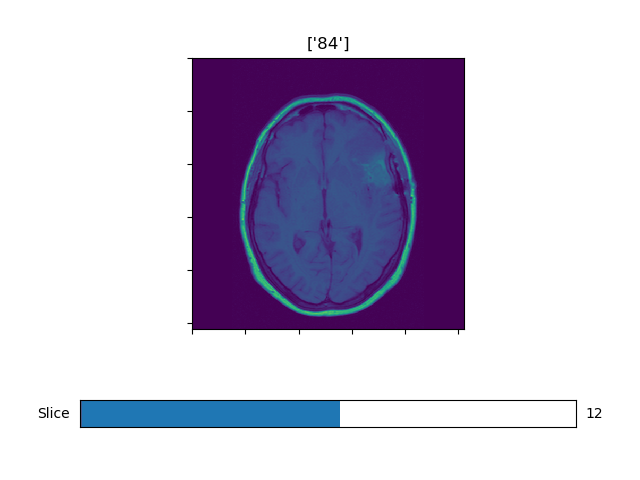

In [26]:
print("Description: ", unique_descriptions[DESCRIPTION_NUMBER - 1])
print()
view_unique_description(DESCRIPTION_NUMBER - 1)